# Problem Statement

**Background: -**

Term deposit is a scheme where people can invest their money with a bank for a pre-determined tenure and interest rate, and at maturity the bank returns the principal and interest. 

The banks try to reachout the prospective customers via different means: - 
Telephone
SMS
Newspapers
Radio
Digital ads

All the above marketing activities are expensive and thus, banks need to have a clear target segement of customers who will relatively have higher chance to submit into the scheme.


**Objectives: -**

* To analyze the customer dataset with respect to their chances of investing in Term deposit
* Predicting if a new customer will invest in Term deposit or not.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## BANK TERM DEPOSIT PREDICTION

Features:

•	age numeric age of a person

•	job Categorical,nominal type of job ('admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

•	marital categorical,nominal marital status ('divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

•	education   categorical,nominal ('basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

•	default categorical,nominal has credit in default? ('no','yes','unknown')

•	housing categorical,nominal has housing loan? ('no','yes','unknown')

•	loan    categorical,nominal has personal loan? ('no','yes','unknown')

•	contact categorical,nominal contact communication type ('cellular','telephone')

•	month   categorical,ordinal last contact month of year ('jan', 'feb', 'mar', ..., 'nov', 'dec')

•	day_of_week categorical,ordinal last contact day of the week ('mon','tue','wed','thu','fri')

•	duration    numeric last contact duration, in seconds . Important note: this attribute highly affects the output target (e.g., if duration=0 then   y='no')

•	campaign    numeric number of contacts performed during this campaign and for this client (includes last contact)

•	pdays   numeric number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted)

•	previous    numeric number of contacts performed before this campaign and for this client

•	poutcome    categorical,nominal outcome of the previous marketing campaign ('failure','nonexistent','success')



Target:

y	binary	has the client subscribed a term deposit? ('yes','no')

# Exploratory Data Analysis (EDA)

•	Find unwanted columns
•	Find Missing values
•	Find Feature with one Values – so we can remove that
•	Explore the Categorical feature
•	Find Categorical feature Distribution
•	Relationship between Categorical features and Label
•	Explore the Numerical features
•	Find the Discrete Numerical features
•	Relationship between Discrete Numerical features and Label
•	Find Continuous numerical features
•	Distribution of Continuous numerical features
•	Relationship between Continuous Numerical features and Label
•	Find the Outliers in numerical features
•	Explore the Correlation between numerical features
•	Find pair plot	
•	Check the Data set is Balanced or not based on target values in classification.

In [9]:
df = pd.read_csv(r"C:\Users\Srinath\Desktop\Datasets\bank_data.csv")

df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [10]:
pd.set_option('display.max_columns',None)


In [11]:
df.shape

(11162, 17)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [13]:
df.isnull().sum()

# No null values

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [14]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [15]:
#Rename columns based on our convenient to understand features

df.rename(columns ={'default':'credit_default'},inplace= True)
df.rename(columns ={'housing':'housing_loan'},inplace= True)
df.rename(columns ={'loan':'personal_loan'},inplace= True)
df.rename(columns ={'contact':'contact_via'},inplace= True)
df.rename(columns ={'day':'last_contact_day'},inplace= True)
df.rename(columns ={'month':'last_contact_month'},inplace= True)
df.rename(columns ={'duration':'call_duration'},inplace= True)
df.rename(columns ={'campaign':'num_of_call_during_campaign'},inplace= True)
df.rename(columns ={'pdays':'num_of_days_passed_by_last_contacted'},inplace= True)
df.rename(columns ={'previous':'Num_of_contact_before_this_campaign'},inplace= True)
df.rename(columns ={'poutcome':'previous_outcome'},inplace= True)

In [16]:
df

,age,job,marital,education,credit_default,balance,housing_loan,personal_loan,contact_via,last_contact_day,last_contact_month,call_duration,num_of_call_during_campaign,num_of_days_passed_by_last_contacted,Num_of_contact_before_this_campaign,previous_outcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [17]:
# Feature with one value:

for column in df:
    print(column,df[column].nunique())
# so no feature has one values

age 76
job 12
marital 3
education 4
credit_default 2
balance 3805
housing_loan 2
personal_loan 2
contact_via 3
last_contact_day 31
last_contact_month 12
call_duration 1428
num_of_call_during_campaign 36
num_of_days_passed_by_last_contacted 472
Num_of_contact_before_this_campaign 34
previous_outcome 4
deposit 2


In [18]:
# Print the Categorical feature and its unique Categories

for col in df.select_dtypes(include= 'object'):
    print(col)
    print(df[col].unique())


job
['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
marital
['married' 'single' 'divorced']
education
['secondary' 'tertiary' 'primary' 'unknown']
credit_default
['no' 'yes']
housing_loan
['yes' 'no']
personal_loan
['no' 'yes']
contact_via
['unknown' 'cellular' 'telephone']
last_contact_month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
previous_outcome
['unknown' 'other' 'failure' 'success']
deposit
['yes' 'no']


In [19]:
# Print the Categorical feature and its Number of unique values

for col in df.select_dtypes(include= 'object'):
    if col == "deposit":
        continue
    print("The categorial feature {} has {} categories".format(col,df[col].nunique()))

The categorial feature job has 12 categories
The categorial feature marital has 3 categories
The categorial feature education has 4 categories
The categorial feature credit_default has 2 categories
The categorial feature housing_loan has 2 categories
The categorial feature personal_loan has 2 categories
The categorial feature contact_via has 3 categories
The categorial feature last_contact_month has 12 categories
The categorial feature previous_outcome has 4 categories


In [20]:
categorical_feature = [x for x in df.columns if ((df[x].dtype =='object') and x!= 'deposit')]

In [21]:
categorical_feature

['job',
 'marital',
 'education',
 'credit_default',
 'housing_loan',
 'personal_loan',
 'contact_via',
 'last_contact_month',
 'previous_outcome']

# Findings

* There is no missing values in the dateset
* There is no unwanted columns in the data set and there is no feature with one value so we can keep all the features for analysis.
* There are 9 catergorical feature. Deposit is ignored because it is our target feature.
* Categorical feature job and last contact month in the data is heighest number of category. Each has 12 Categories


##### Categorial feature Distribution

In [22]:
# df['marital'].value_counts()

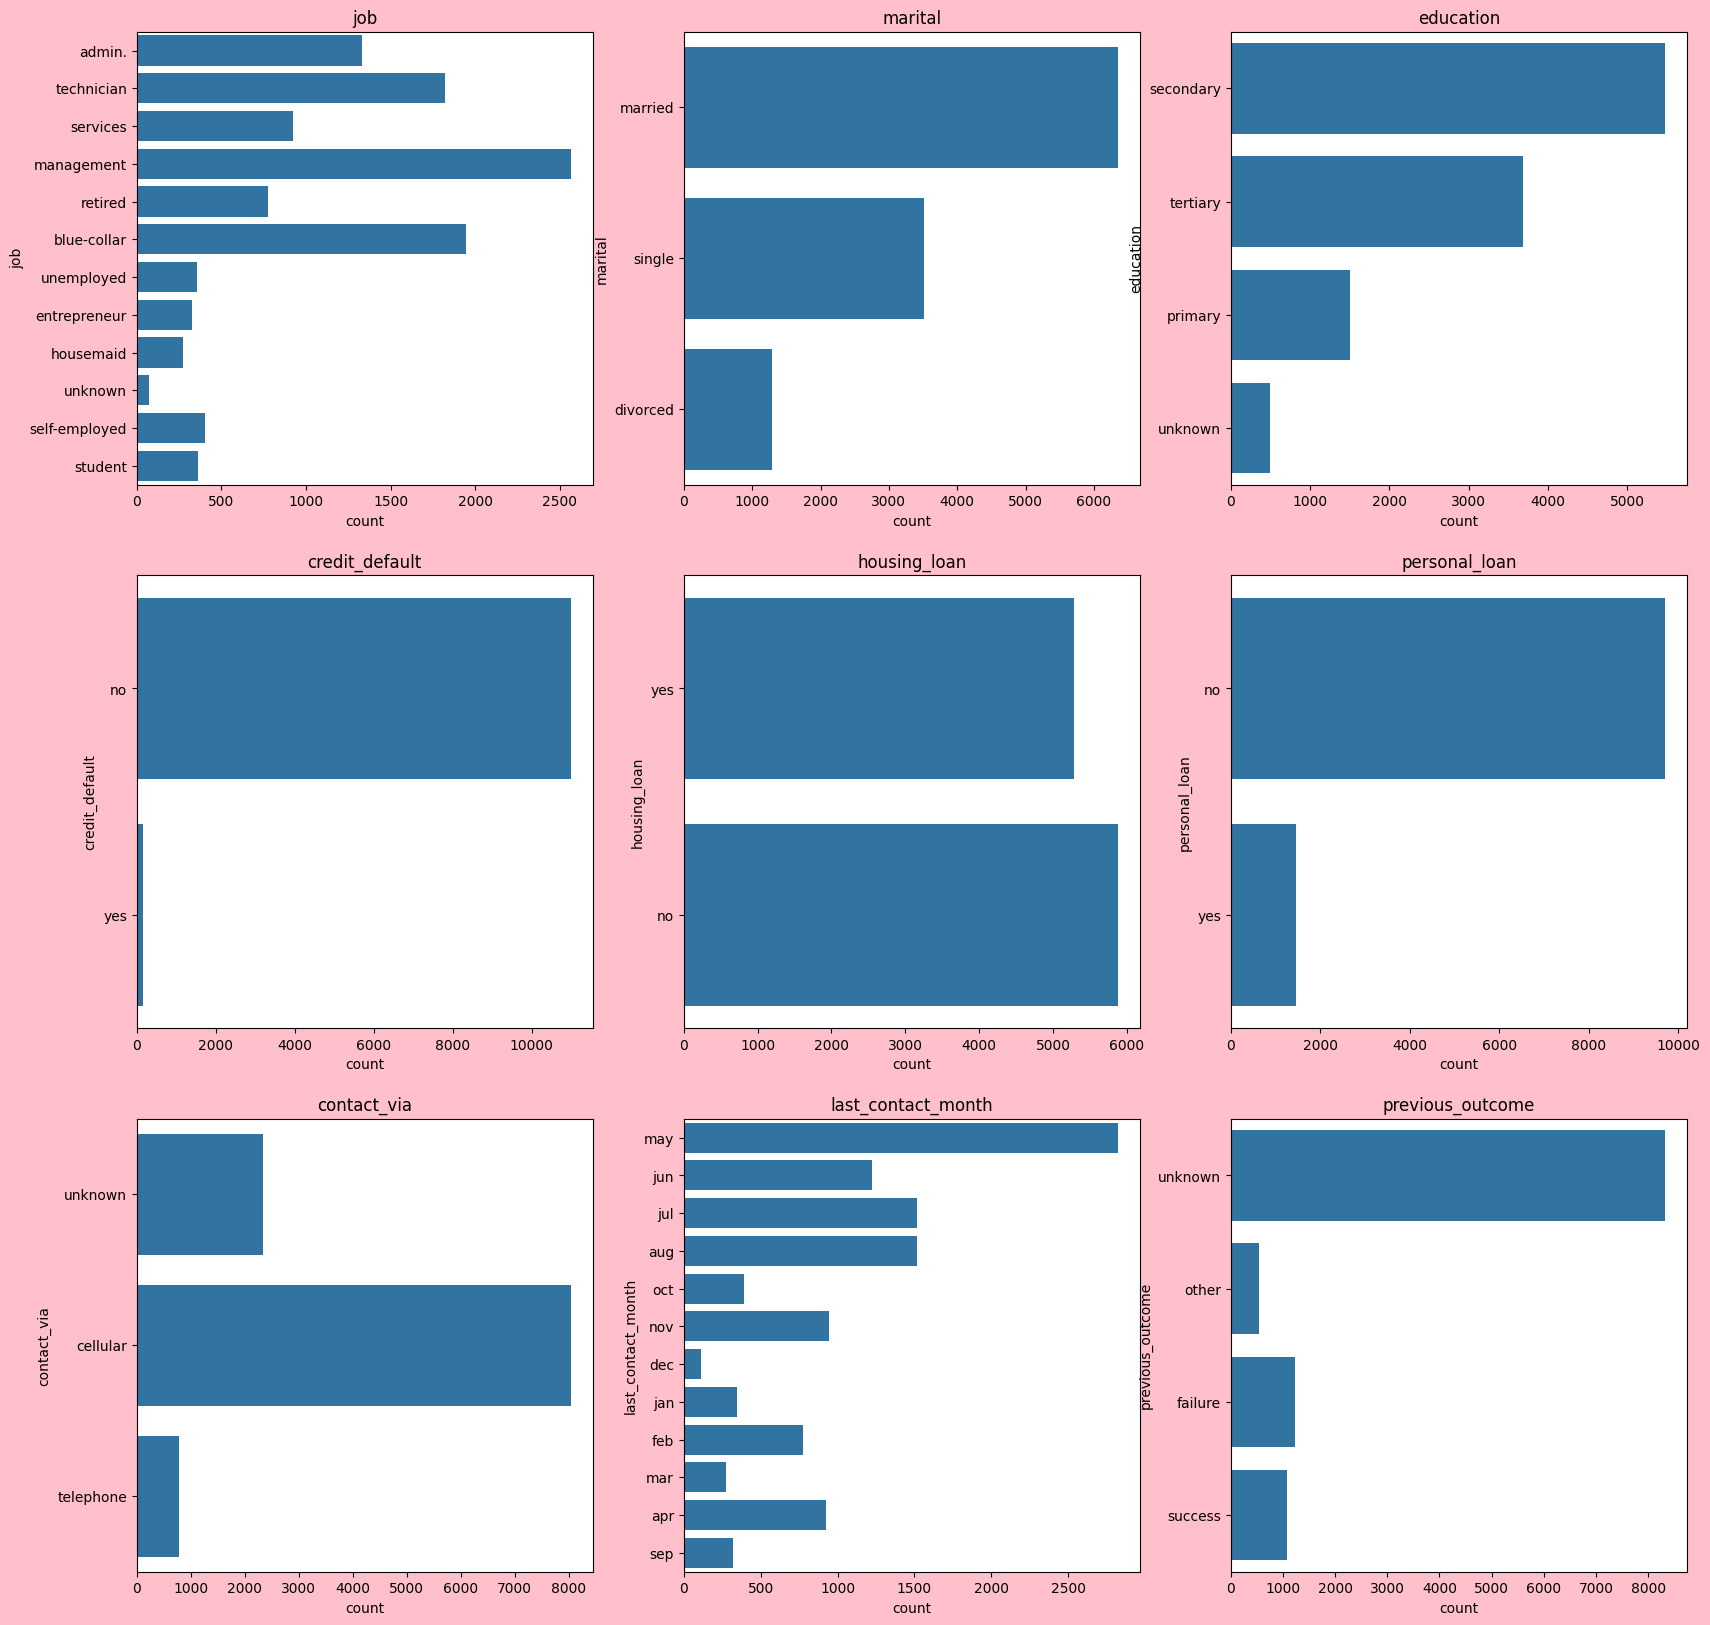

In [23]:
plt.figure(figsize=(20,20),facecolor= 'pink')
plotnumber=1
for feature in categorical_feature:
    plt.subplot(3,3,plotnumber)
    sns.countplot(data=df,y=feature)
    plt.title(feature)
    plotnumber+=1

plt.show()

Findings

* The person whose job type is managerment has been contacted more and the person whose job type is house maid has been contacted the least.
* Married persons have been contacted more and the divorced person has been contacted the least.
* The person whose education background is secondary are in high numbers in the given dataset.
* Default feature seems to be does not play important role as it has value of "No" at high ratio than yes, so we can drop
* Mostly the person with no credit & personal loan has been contacted.
* In the given month, may month is the most contacted and Dec month is least contacted month.

Relationship between Categorial features with Term Deposit

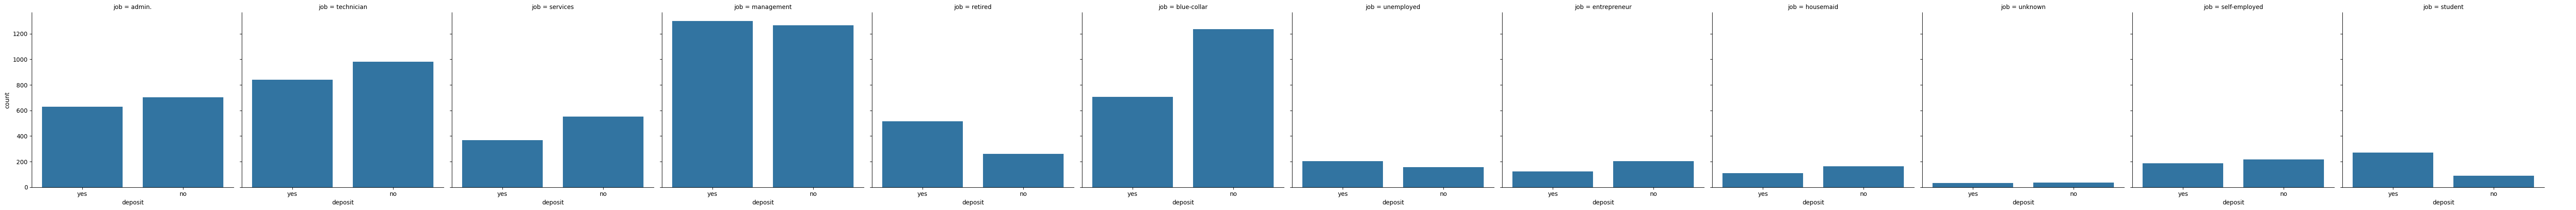

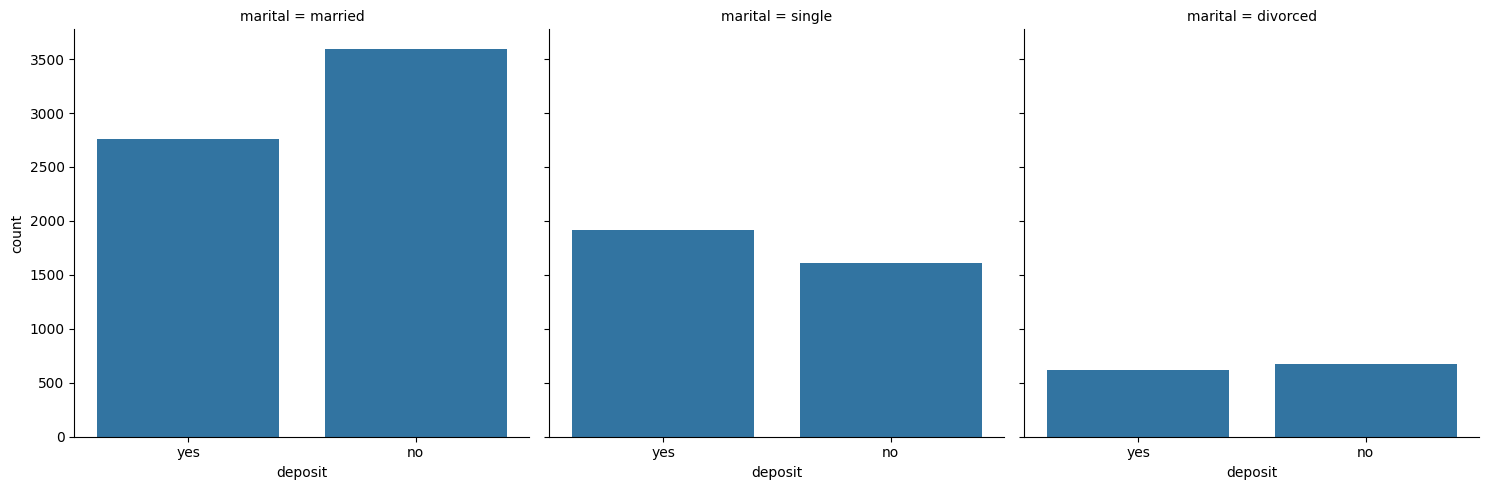

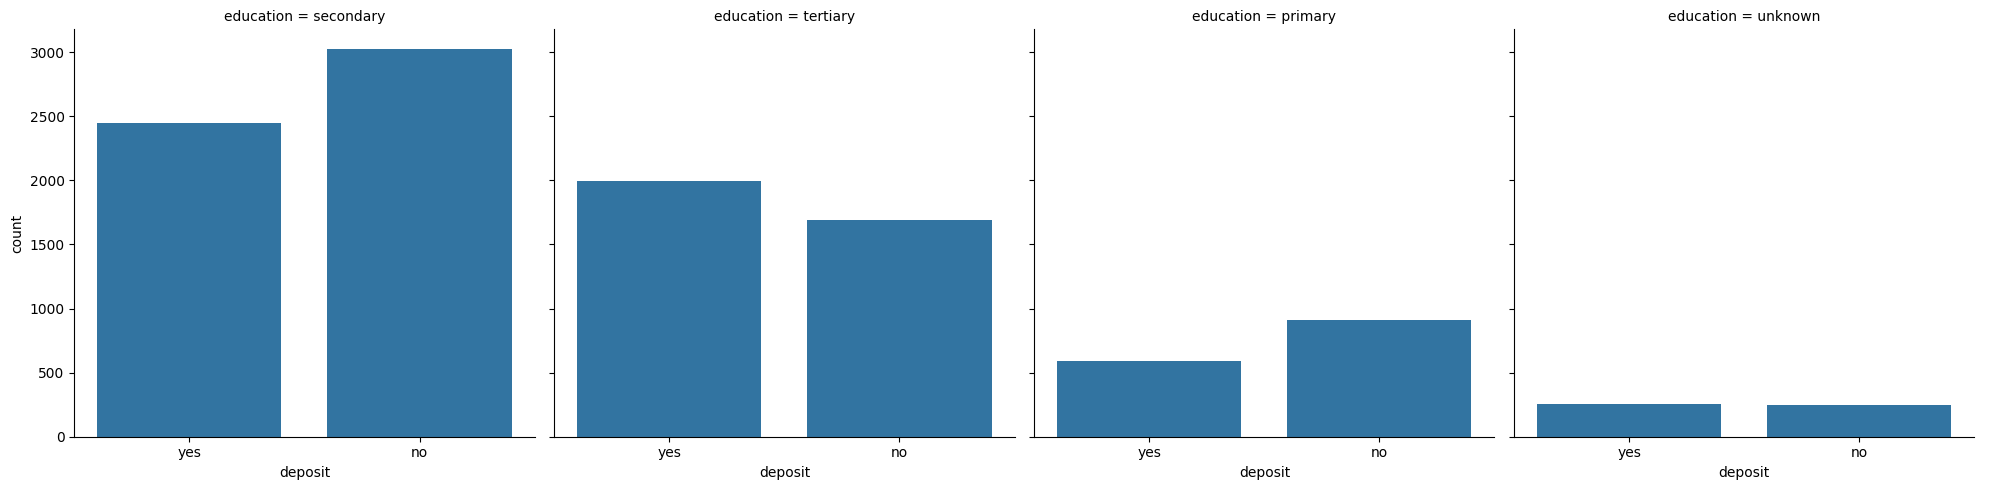

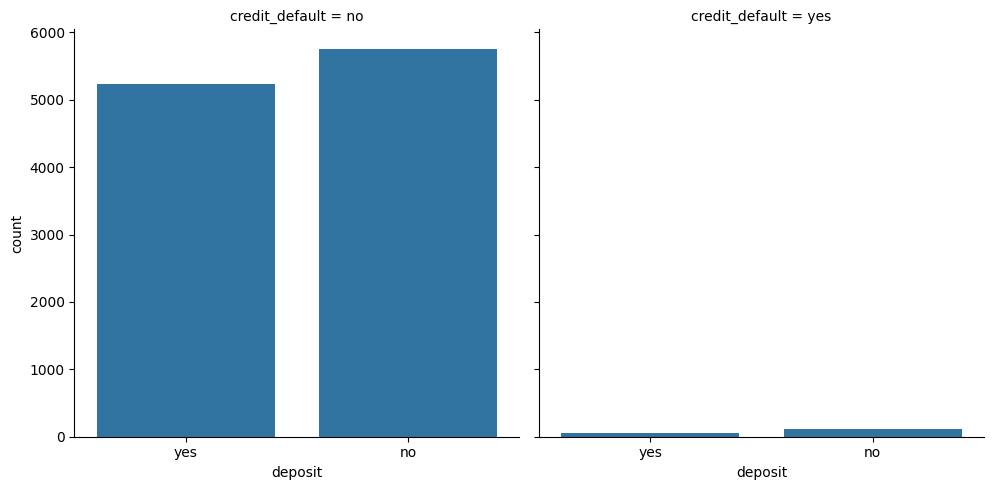

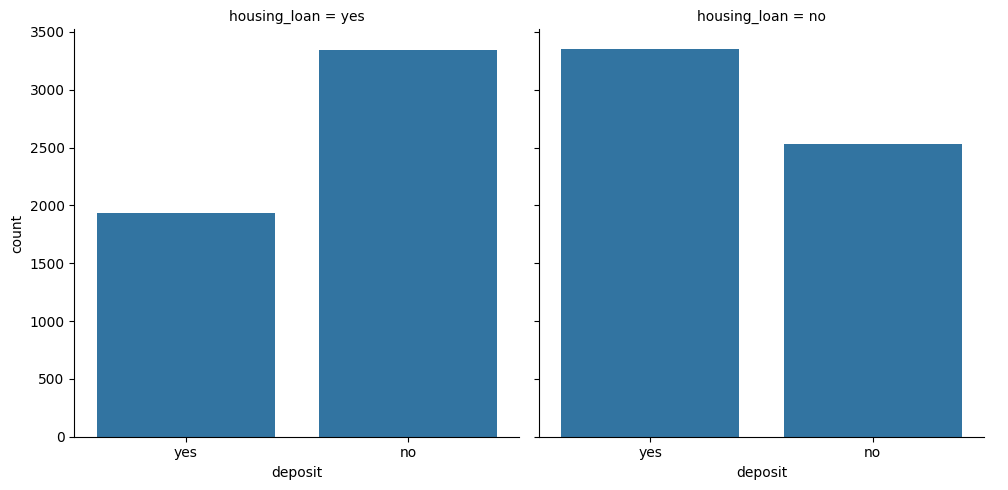

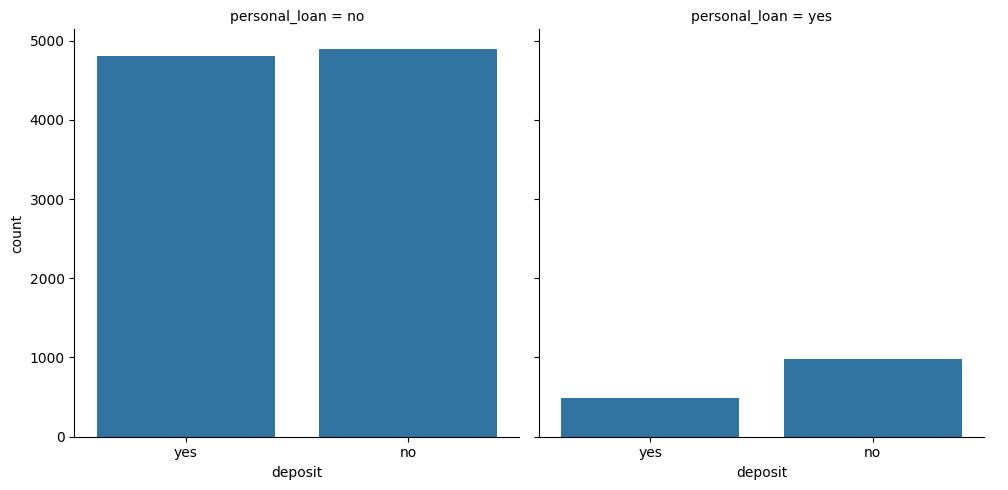

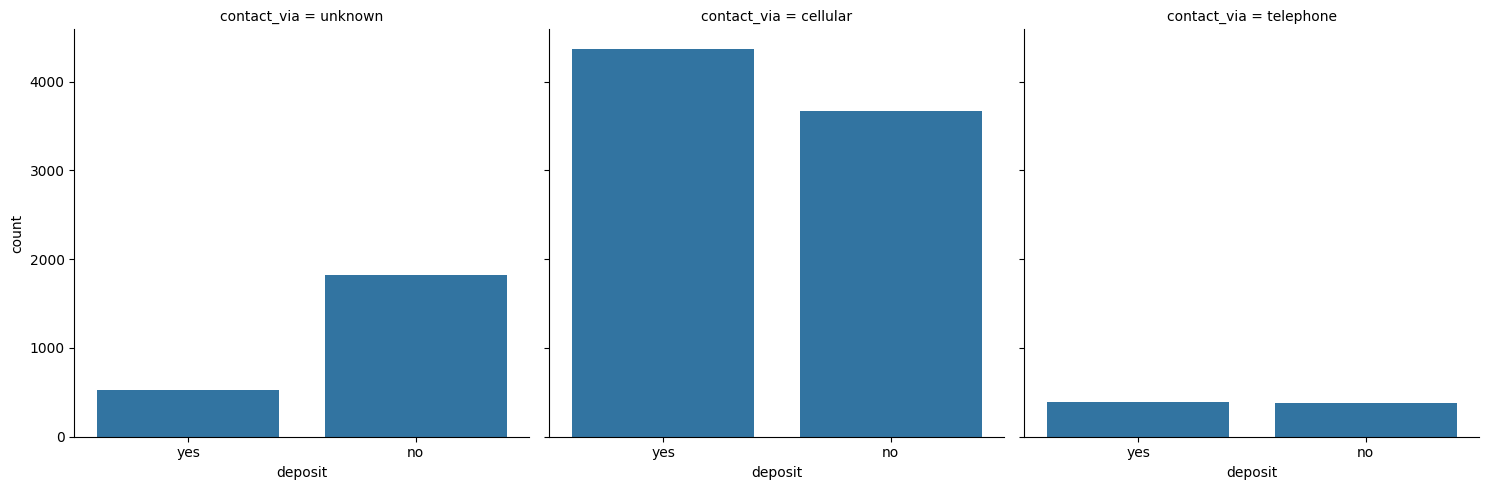

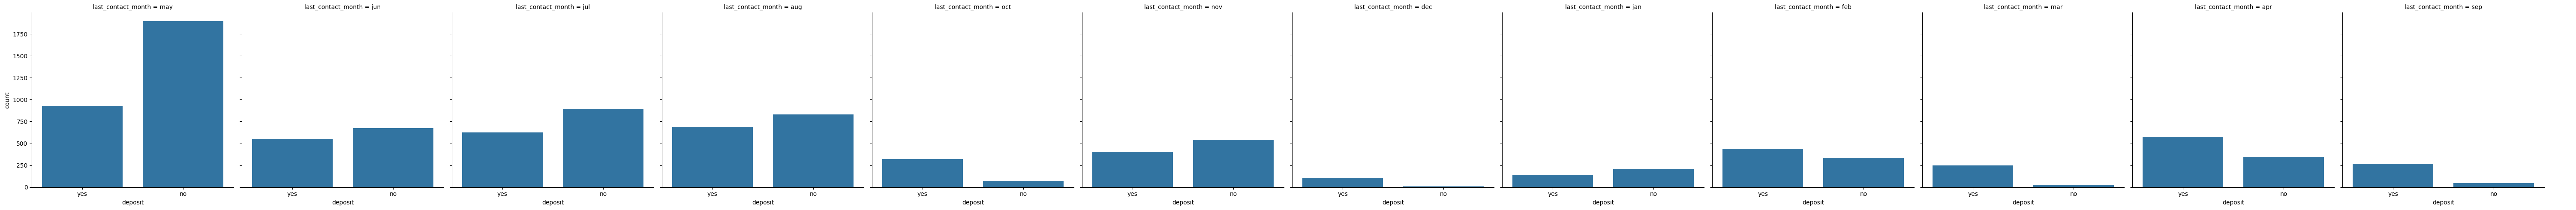

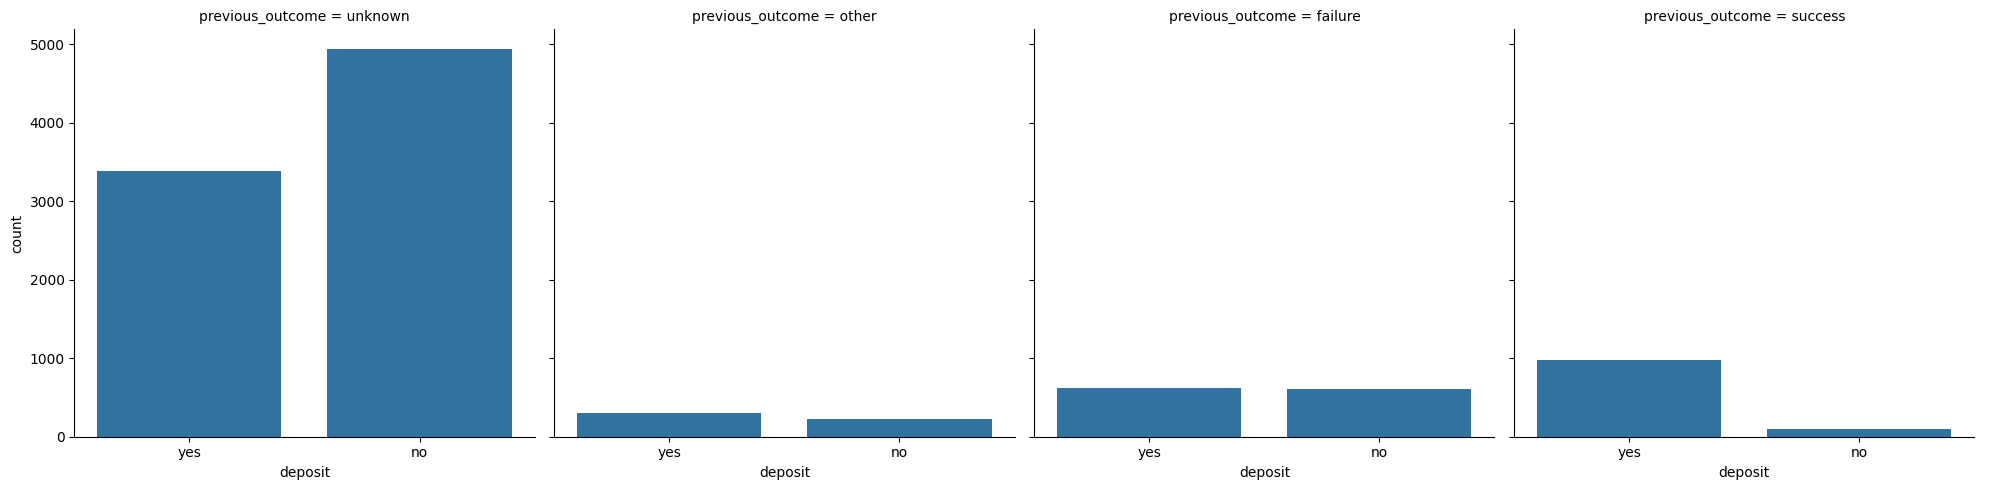

In [24]:
for feature in categorical_feature:
    sns.catplot(data=df,x='deposit',col=feature,kind='count')

In [25]:
for feature in categorical_feature:
    print(df.groupby(['deposit',feature]).size())

deposit  job          
no       admin.            703
         blue-collar      1236
         entrepreneur      205
         housemaid         165
         management       1265
         retired           262
         self-employed     218
         services          554
         student            91
         technician        983
         unemployed        155
         unknown            36
yes      admin.            631
         blue-collar       708
         entrepreneur      123
         housemaid         109
         management       1301
         retired           516
         self-employed     187
         services          369
         student           269
         technician        840
         unemployed        202
         unknown            34
dtype: int64
deposit  marital 
no       divorced     671
         married     3596
         single      1606
yes      divorced     622
         married     2755
         single      1912
dtype: int64
deposit  education
no       prima

# Findings

* Retired client has high interest on deposit
* Client who has housing loan seems to be not interested much on deposit
* If pre campaign Previous outcome is success then the interest on deposit is far high.
* In month of March, Sep, Oct, Dec client show high interset on deposit
* In month of May,records are high but client interest ratio is very less.

# Explore the Numerical feature

In [81]:
numerical_feature = [x for x in df.columns if (df[x].dtype!='object')]

In [82]:
df[numerical_feature]

,age,balance,last_contact_day,call_duration,num_of_call_during_campaign,num_of_days_passed_by_last_contacted,Num_of_contact_before_this_campaign
0,59,2343,5,1042,1,-1,0
1,56,45,5,1467,1,-1,0
2,41,1270,5,1389,1,-1,0
3,55,2476,5,579,1,-1,0
4,54,184,5,673,2,-1,0
...,...,...,...,...,...,...,...
11157,33,1,20,257,1,-1,0
11158,39,733,16,83,4,-1,0
11159,32,29,19,156,2,-1,0
11160,43,0,8,9,2,172,5


There are 7 Numerical feature

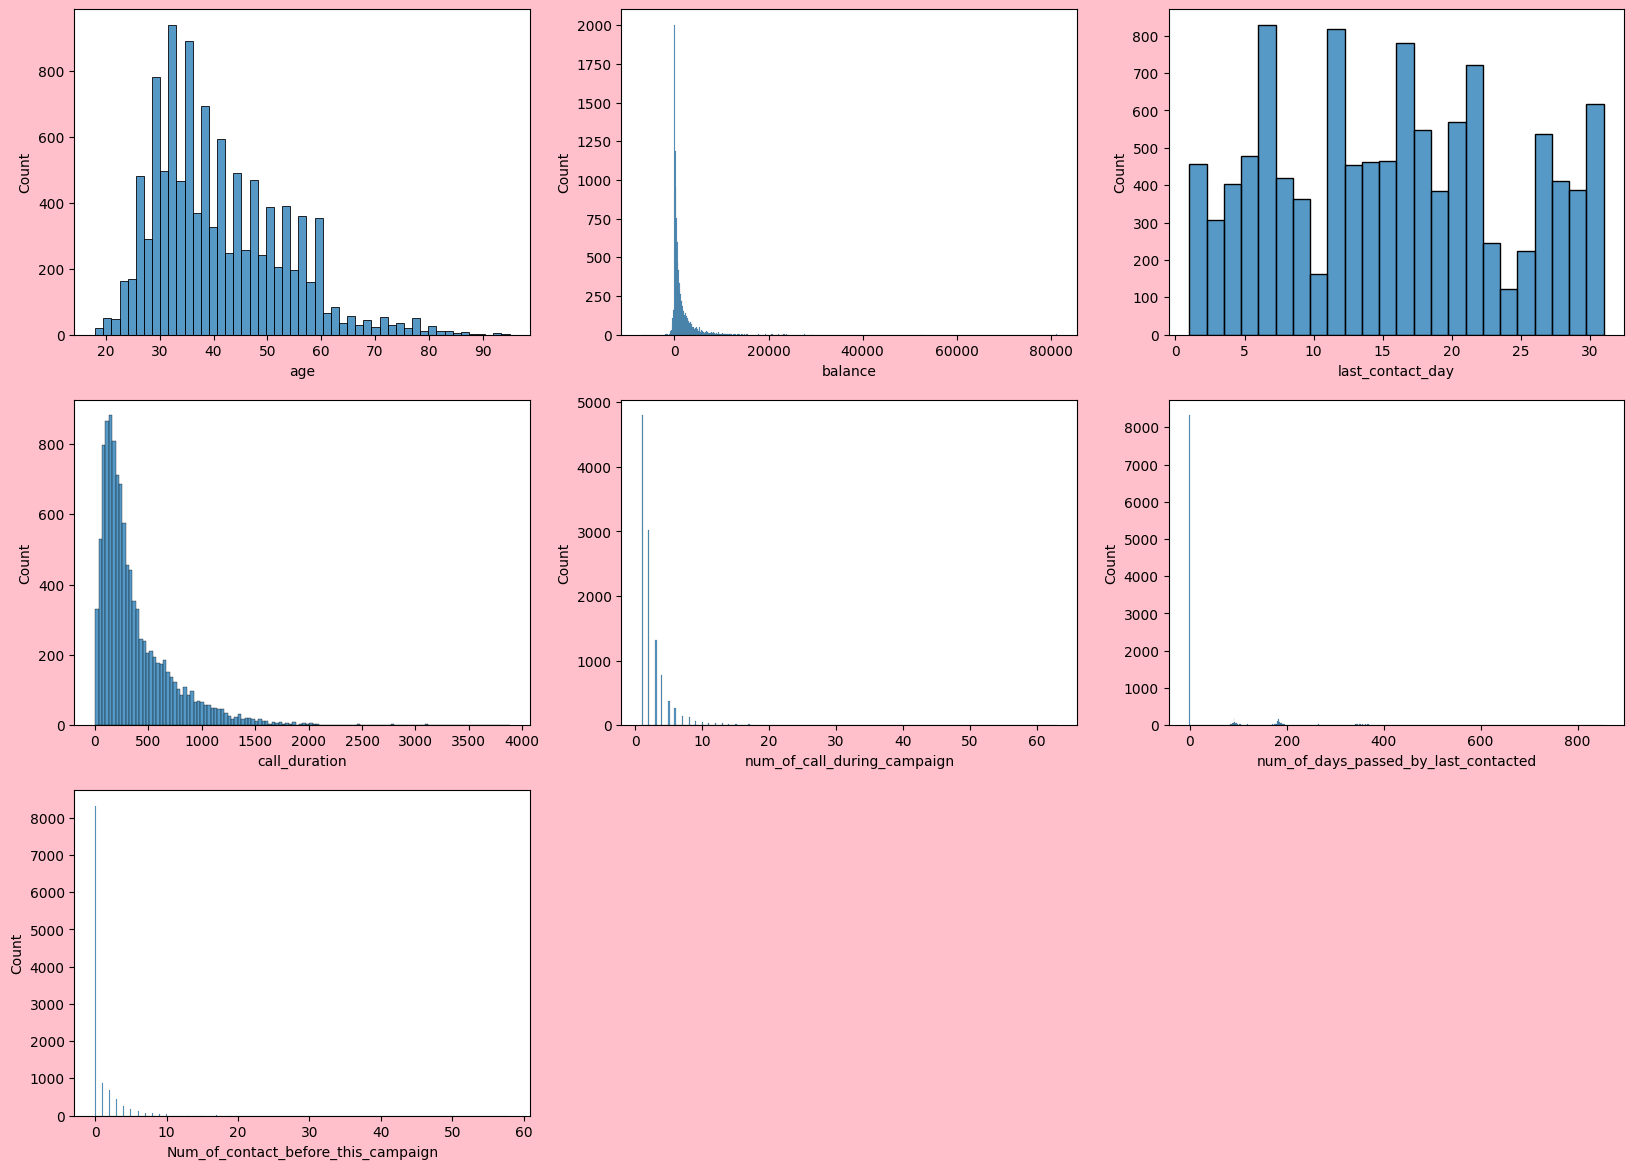

In [28]:
# Distribution of  Numerical features

plt.figure(figsize= (20,60),facecolor='pink')
plotnumber = 1
for feature in numerical_feature:
    plt.subplot(12,3,plotnumber)
    sns.histplot(data=df,x=feature)
    plt.xlabel(feature)
    plotnumber = plotnumber+1
plt.show()

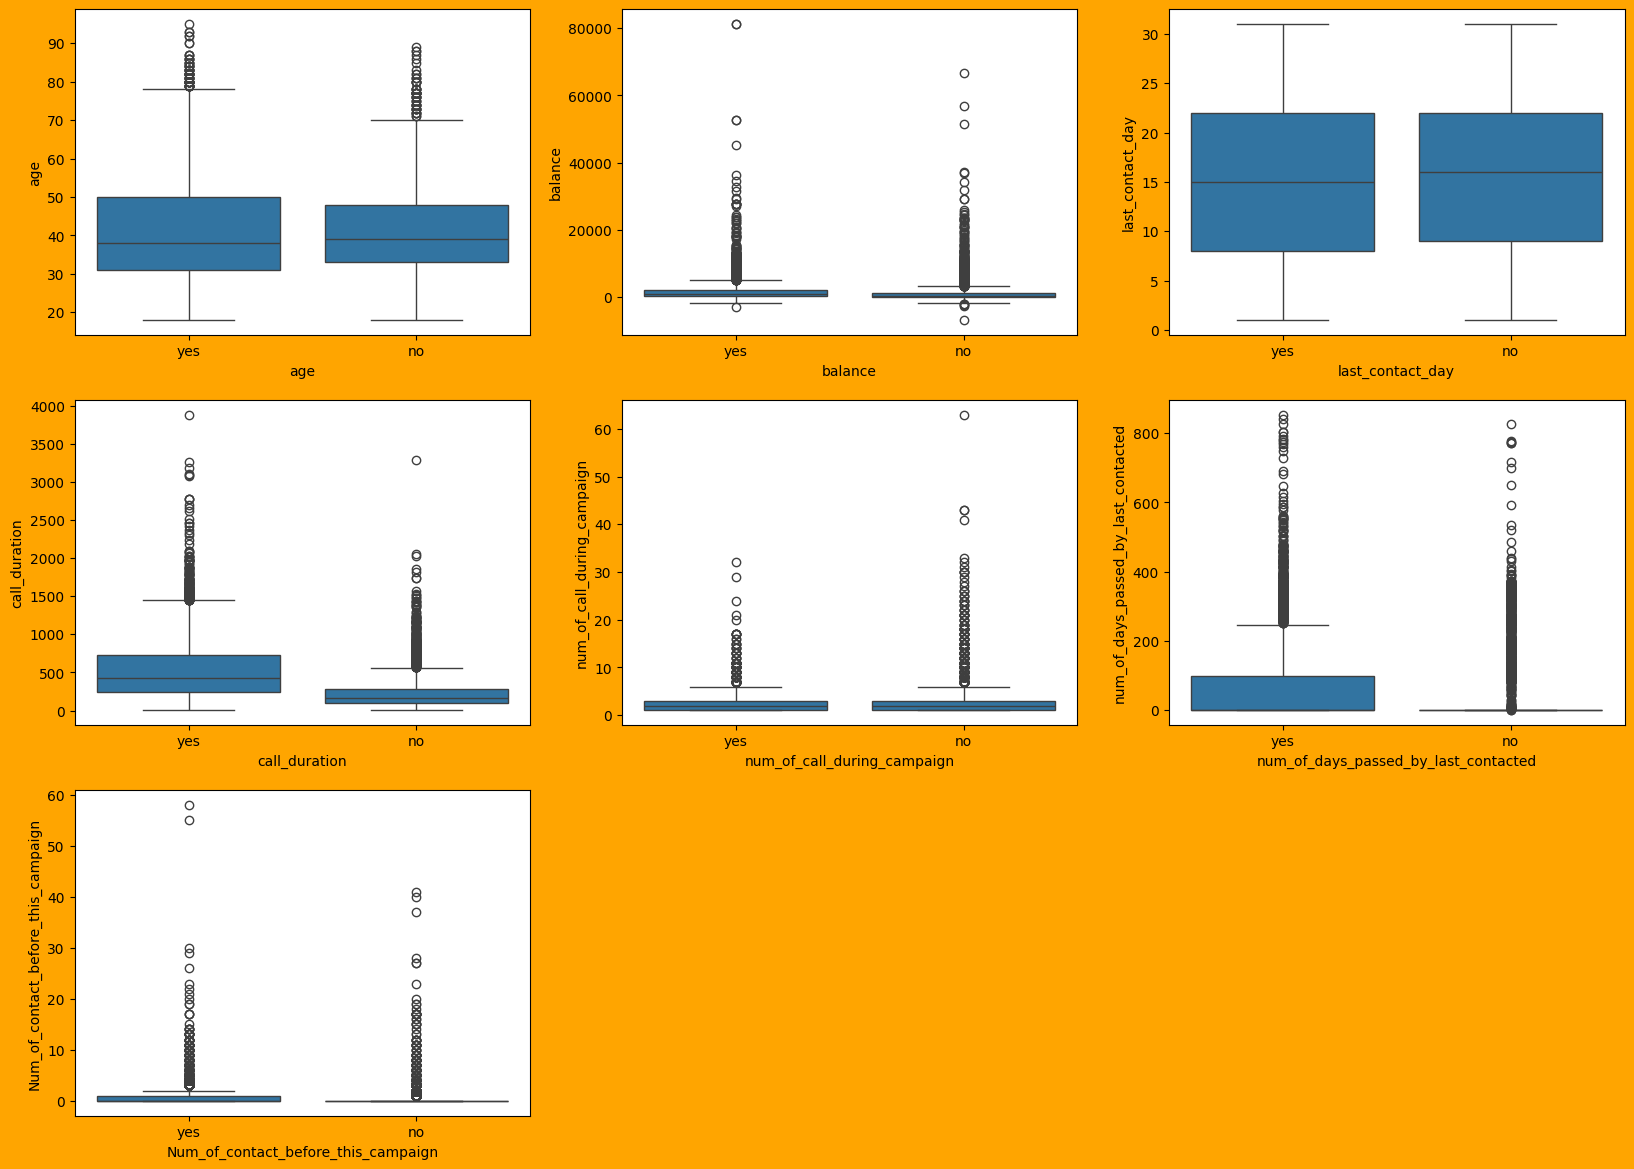

In [29]:
# Relationship between Numerical feature and Labels

#boxplot to show target distribution with respect numerical features

plt.figure(figsize= (20,60),facecolor= 'orange')
plotnumber =1
for feature in numerical_feature:
    plt.subplot(12,3,plotnumber)
    sns.boxplot(df,x = 'deposit',y = feature)
    plt.xlabel(feature)
    plotnumber = plotnumber+1
plt.show()


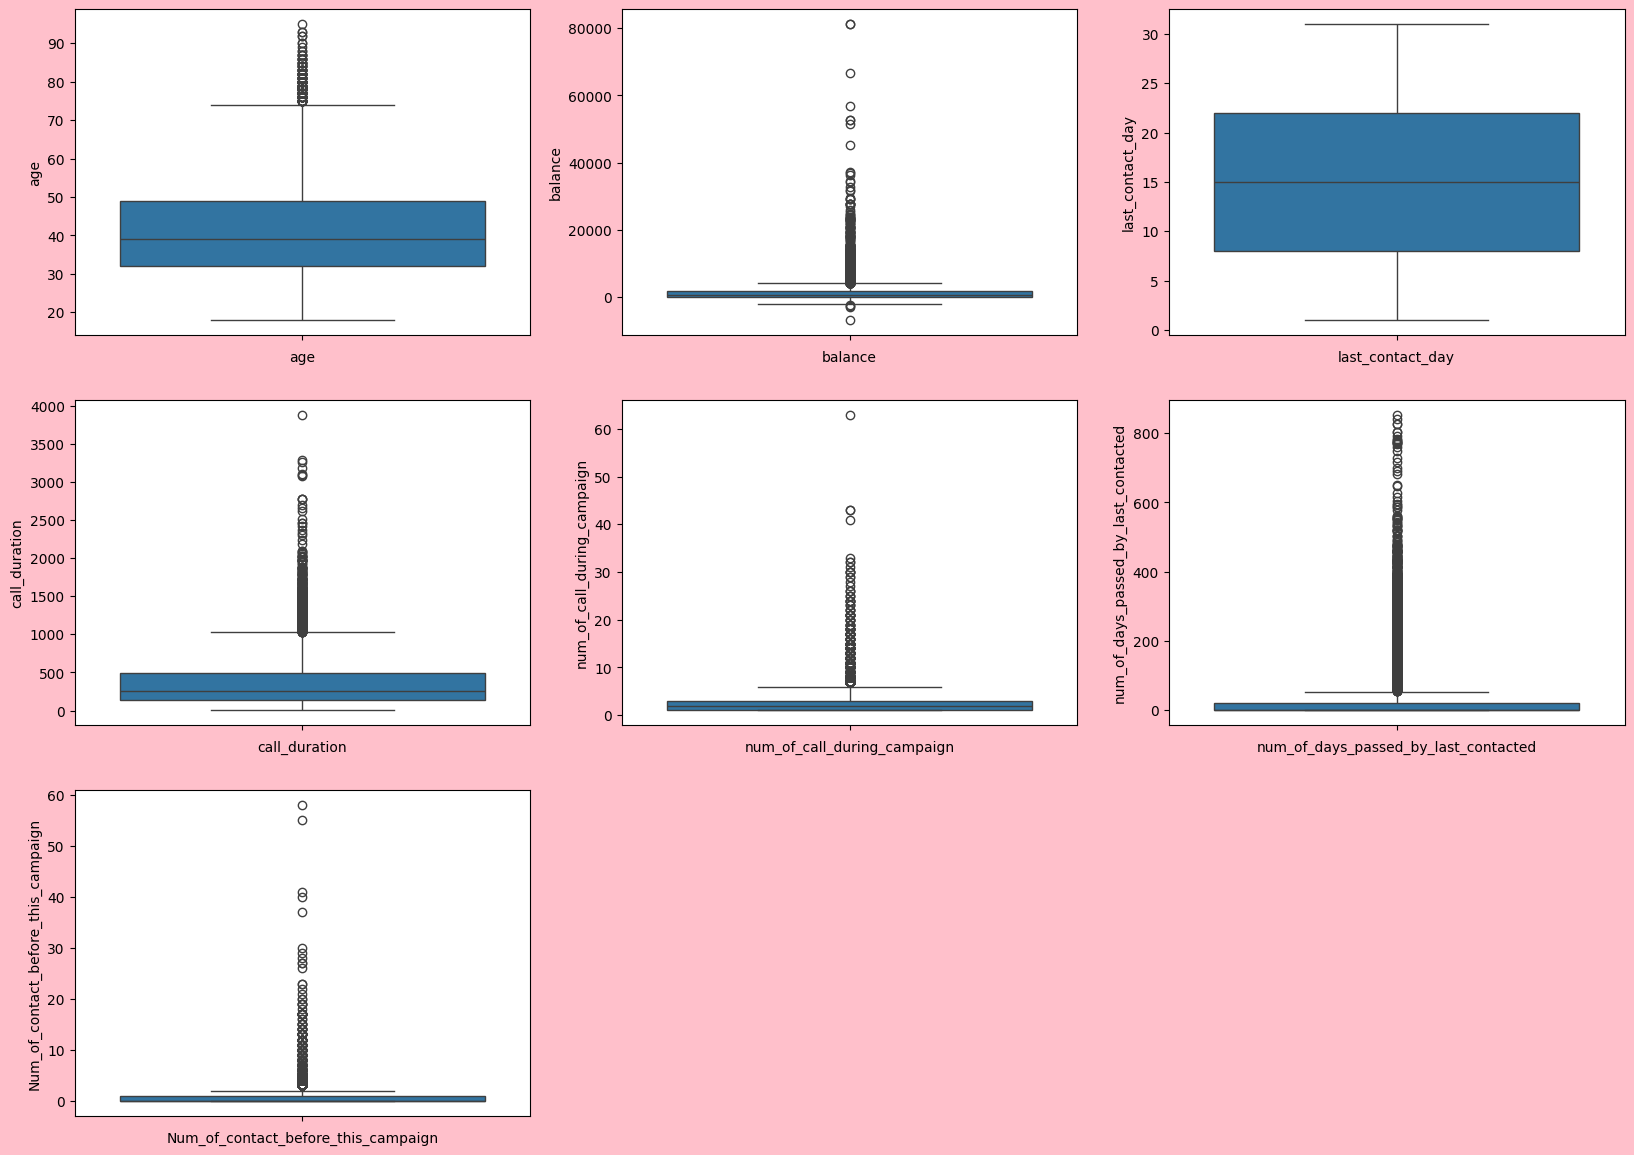

In [30]:
# Find Outliers in numerical features

# boxplot on numerical features to find outliers:

plt.figure(figsize= (20,60),facecolor= 'pink')
plotnumber =1
for feature in numerical_feature:
    plt.subplot(12,3,plotnumber)
    sns.boxplot(df[feature])
    plt.xlabel(feature)
    plotnumber = plotnumber+1
plt.show()

Take away:

Age,balance, call duration, Num of call during campaign, Num of days passed, Num of contact previous campaign has some outliers.

In [31]:



# def detect_replace_outliers_iqr(data):
        # replace_outlier = []
#     data = sorted(data)
#     q1 = np.percentile(data, 25)
#     q3 = np.percentile(data, 75)
#     IQR = q3-q1
#     lwr_bound = q1-(1.5*IQR)
#     upr_bound = q3+(1.5*IQR)

#     return [max(min(i, upr_bound), lwr_bound) for i in data]


    # for i in data:
    #     if i<lwr_bound:
    #         i =lwr_bound
    #     if i>upr_bound:
    #         i = upr_bound
    #     replace_outlier.append(i)
        
    # print(replace_outlier)
    # return replace_outlier
    
        
    

#     return outliers


In [32]:
# Capping - IQR
# Trimming

In [33]:
# for feature in numerical_feature:
#     df[feature] = detect_replace_outliers_iqr(df[feature])

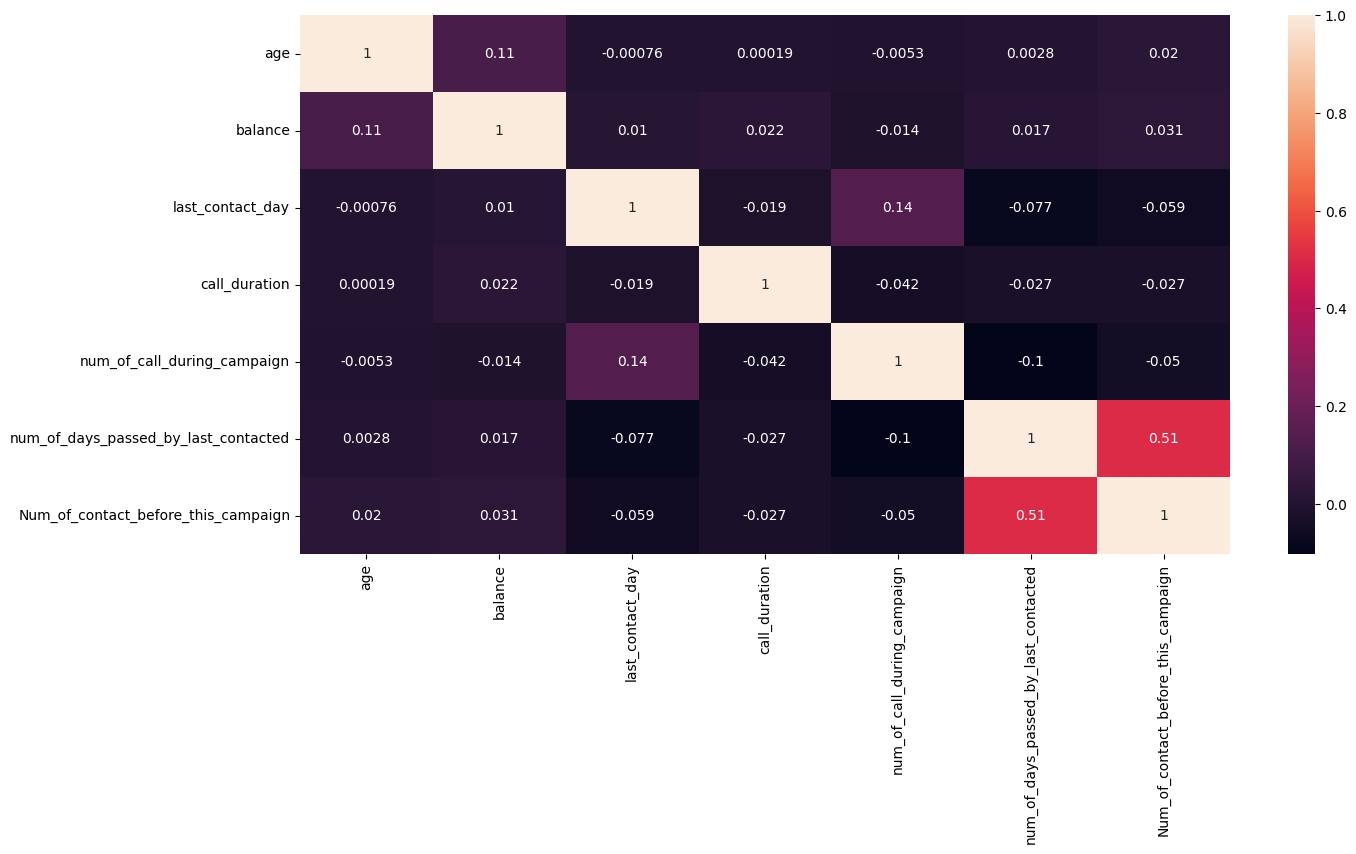

In [34]:
num_feature = df[numerical_feature]

cor_mat = num_feature.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot= True)
plt.show()

# Take away:

it seems no feature is heavily correlated with other features

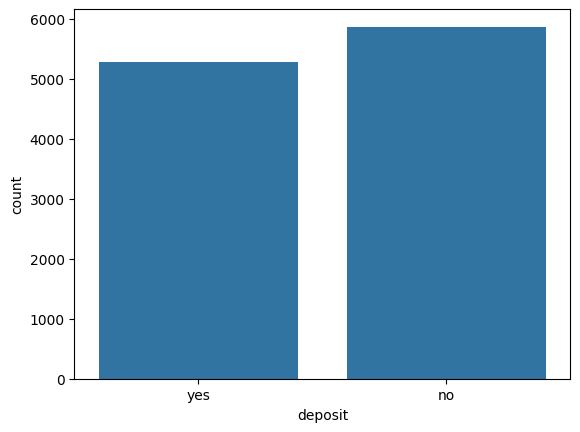

In [35]:
# To Check the Data set is Balanced or not based on target values in classification.

sns.countplot(x='deposit',data = df)
plt.show()

In [36]:
df['deposit'].groupby(df['deposit']).size()

deposit
no     5873
yes    5289
Name: deposit, dtype: int64

In [37]:
# df.deposit.value_counts()

In [38]:
categorical_feature

['job',
 'marital',
 'education',
 'credit_default',
 'housing_loan',
 'personal_loan',
 'contact_via',
 'last_contact_month',
 'previous_outcome']

In [39]:
# cat_cols = ['job','marital','education','credit_default','housing_loan','personal_loan','contact_via','last_contact_month','previous_outcome']

# df_ready = pd.get_dummies(data = df,columns = cat_cols,dtype= int)

# df_ready['deposit'] = df['deposit'].apply(lambda x : 1 if x =='yes' else 0)

# df_ready

Given dataset seems to be balanced

In [40]:
df1 = df.copy()

df1

,age,job,marital,education,credit_default,balance,housing_loan,personal_loan,contact_via,last_contact_day,last_contact_month,call_duration,num_of_call_during_campaign,num_of_days_passed_by_last_contacted,Num_of_contact_before_this_campaign,previous_outcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [41]:
##Insights -  one hot encoding (Contact via -unknown)

In [42]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   age                                   11162 non-null  int64 
 1   job                                   11162 non-null  object
 2   marital                               11162 non-null  object
 3   education                             11162 non-null  object
 4   credit_default                        11162 non-null  object
 5   balance                               11162 non-null  int64 
 6   housing_loan                          11162 non-null  object
 7   personal_loan                         11162 non-null  object
 8   contact_via                           11162 non-null  object
 9   last_contact_day                      11162 non-null  int64 
 10  last_contact_month                    11162 non-null  object
 11  call_duration               

In [43]:
df1.credit_default.value_counts()

credit_default
no     10994
yes      168
Name: count, dtype: int64

In [44]:
df1["credit_default"].value_counts(normalize= True)*100

# df1["contact_via"].value_counts(normalize= True)*100


credit_default
no     98.494893
yes     1.505107
Name: proportion, dtype: float64

* credit Default data is one sided so, we can drop the columns
* contact via data do not provide any value for our model, so we can drop the column.

In [45]:
df1.drop(['credit_default','contact_via'],axis= 1,inplace = True)

df1.head()

,age,job,marital,education,balance,housing_loan,personal_loan,last_contact_day,last_contact_month,call_duration,num_of_call_during_campaign,num_of_days_passed_by_last_contacted,Num_of_contact_before_this_campaign,previous_outcome,deposit
0,59,admin.,married,secondary,2343,yes,no,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,45,no,no,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,1270,yes,no,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,2476,yes,no,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,184,no,no,5,may,673,2,-1,0,unknown,yes


# Encoding

one_hot_encoding

####### contact_via already removed

In [46]:
categorical_feature

['job',
 'marital',
 'education',
 'credit_default',
 'housing_loan',
 'personal_loan',
 'contact_via',
 'last_contact_month',
 'previous_outcome']

In [47]:
nominal_data= ['job','marital','education','last_contact_month','previous_outcome']


In [48]:
for nom in nominal_data:
    df1 = pd.concat([df1,pd.get_dummies(df1[nom],prefix=nom,dtype = int)],axis=1)
    df1.drop(nom,axis=1,inplace= True)
   

In [49]:
df1

,age,balance,housing_loan,personal_loan,last_contact_day,call_duration,num_of_call_during_campaign,num_of_days_passed_by_last_contacted,Num_of_contact_before_this_campaign,deposit,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,last_contact_month_apr,last_contact_month_aug,last_contact_month_dec,last_contact_month_feb,last_contact_month_jan,last_contact_month_jul,last_contact_month_jun,last_contact_month_mar,last_contact_month_may,last_contact_month_nov,last_contact_month_oct,last_contact_month_sep,previous_outcome_failure,previous_outcome_other,previous_outcome_success,previous_outcome_unknown
0,59,2343,yes,no,5,1042,1,-1,0,yes,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,56,45,no,no,5,1467,1,-1,0,yes,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,41,1270,yes,no,5,1389,1,-1,0,yes,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,55,2476,yes,no,5,579,1,-1,0,yes,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,54,184,no,no,5,673,2,-1,0,yes,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,yes,no,20,257,1,-1,0,no,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
11158,39,733,no,no,16,83,4,-1,0,no,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
11159,32,29,no,no,19,156,2,-1,0,no,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
11160,43,0,no,yes,8,9,2,172,5,no,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


Label_Encoding

In [50]:
categorical_feature

['job',
 'marital',
 'education',
 'credit_default',
 'housing_loan',
 'personal_loan',
 'contact_via',
 'last_contact_month',
 'previous_outcome']

In [51]:
ordinal_data = ['housing_loan','personal_loan','deposit']

In [52]:
def new(x):
    if x== "yes":
        return 1
    else:
        return 0


In [53]:
for data in ordinal_data:
    df1[data+'_new'] = df1[data].apply(new)
    df1.drop(data,axis=1,inplace= True)

In [54]:
df1

,age,balance,last_contact_day,call_duration,num_of_call_during_campaign,num_of_days_passed_by_last_contacted,Num_of_contact_before_this_campaign,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,last_contact_month_apr,last_contact_month_aug,last_contact_month_dec,last_contact_month_feb,last_contact_month_jan,last_contact_month_jul,last_contact_month_jun,last_contact_month_mar,last_contact_month_may,last_contact_month_nov,last_contact_month_oct,last_contact_month_sep,previous_outcome_failure,previous_outcome_other,previous_outcome_success,previous_outcome_unknown,housing_loan_new,personal_loan_new,deposit_new
0,59,2343,5,1042,1,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1
1,56,45,5,1467,1,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
2,41,1270,5,1389,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1
3,55,2476,5,579,1,-1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1
4,54,184,5,673,2,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,20,257,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
11158,39,733,16,83,4,-1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
11159,32,29,19,156,2,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
11160,43,0,8,9,2,172,5,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0


In [55]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 45 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   age                                   11162 non-null  int64
 1   balance                               11162 non-null  int64
 2   last_contact_day                      11162 non-null  int64
 3   call_duration                         11162 non-null  int64
 4   num_of_call_during_campaign           11162 non-null  int64
 5   num_of_days_passed_by_last_contacted  11162 non-null  int64
 6   Num_of_contact_before_this_campaign   11162 non-null  int64
 7   job_admin.                            11162 non-null  int32
 8   job_blue-collar                       11162 non-null  int32
 9   job_entrepreneur                      11162 non-null  int32
 10  job_housemaid                         11162 non-null  int32
 11  job_management                        111

In [56]:
df1.describe()

#Log Transformation for balance

,age,balance,last_contact_day,call_duration,num_of_call_during_campaign,num_of_days_passed_by_last_contacted,Num_of_contact_before_this_campaign,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,last_contact_month_apr,last_contact_month_aug,last_contact_month_dec,last_contact_month_feb,last_contact_month_jan,last_contact_month_jul,last_contact_month_jun,last_contact_month_mar,last_contact_month_may,last_contact_month_nov,last_contact_month_oct,last_contact_month_sep,previous_outcome_failure,previous_outcome_other,previous_outcome_success,previous_outcome_unknown,housing_loan_new,personal_loan_new,deposit_new
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557,0.119513,0.174162,0.029385,0.024548,0.229887,0.069701,0.036284,0.082691,0.032252,0.163322,0.031984,0.006271,0.115839,0.568984,0.315176,0.134385,0.490593,0.330496,0.044526,0.082691,0.136087,0.009855,0.069522,0.030819,0.135639,0.109479,0.024727,0.253001,0.084483,0.035119,0.028579,0.110016,0.048110,0.095951,0.745924,0.473123,0.130801,0.473840
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007,0.324405,0.379266,0.168892,0.154749,0.420779,0.254653,0.187004,0.275427,0.176677,0.369676,0.175964,0.078946,0.320047,0.495241,0.464607,0.341080,0.499934,0.470413,0.206270,0.275427,0.342896,0.098786,0.254350,0.172834,0.342420,0.312253,0.155298,0.434751,0.278123,0.184089,0.166628,0.312924,0.214008,0.294537,0.435360,0.499299,0.337198,0.499338
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.

# Standard Scaler

In [57]:
## Back up 

df_new = df1.copy()

from sklearn.preprocessing import StandardScaler

## Initialisation

scaler = StandardScaler()

#Taking Numerical columns
num_cols = numerical_feature

#Scaling 

df_new[num_cols] = scaler.fit_transform(df_new[num_cols])

df_new

,age,balance,last_contact_day,call_duration,num_of_call_during_campaign,num_of_days_passed_by_last_contacted,Num_of_contact_before_this_campaign,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,last_contact_month_apr,last_contact_month_aug,last_contact_month_dec,last_contact_month_feb,last_contact_month_jan,last_contact_month_jul,last_contact_month_jun,last_contact_month_mar,last_contact_month_may,last_contact_month_nov,last_contact_month_oct,last_contact_month_sep,previous_outcome_failure,previous_outcome_other,previous_outcome_success,previous_outcome_unknown,housing_loan_new,personal_loan_new,deposit_new
0,1.491505,0.252525,-1.265746,1.930226,-0.554168,-0.481184,-0.363260,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1
1,1.239676,-0.459974,-1.265746,3.154612,-0.554168,-0.481184,-0.363260,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
2,-0.019470,-0.080160,-1.265746,2.929901,-0.554168,-0.481184,-0.363260,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1
3,1.155733,0.293762,-1.265746,0.596366,-0.554168,-0.481184,-0.363260,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1
4,1.071790,-0.416876,-1.265746,0.867171,-0.186785,-0.481184,-0.363260,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,-0.691015,-0.473616,0.515650,-0.331287,-0.554168,-0.481184,-0.363260,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
11158,-0.187357,-0.246658,0.040612,-0.832564,0.547981,-0.481184,-0.363260,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
11159,-0.774958,-0.464934,0.396891,-0.622258,-0.186785,-0.481184,-0.363260,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
11160,0.148416,-0.473926,-0.909466,-1.045752,-0.186785,1.109571,1.818332,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0


# Separating input and output feature

In [76]:
## Input feature

feature = df_new.drop('deposit_new',axis = 1)

## Target

target = df_new['deposit_new']

In [77]:
# Train Test Split

from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test = train_test_split(feature, target, test_size= 0.2,random_state= 7)

# Logistic Regression Model

In [78]:
# Model training

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=100)

lr.fit(X_train, y_train)

LogisticRegression()

In [79]:
# Prediction on test data

y_pred = lr.predict(X_test)

In [80]:
#Evaluation

from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
print('Accuracy :', accuracy_score(y_test,y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy : 0.8078817733990148
Confusion Matrix:
 [[1001  191]
 [ 238  803]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.84      0.82      1192
           1       0.81      0.77      0.79      1041

    accuracy                           0.81      2233
   macro avg       0.81      0.81      0.81      2233
weighted avg       0.81      0.81      0.81      2233



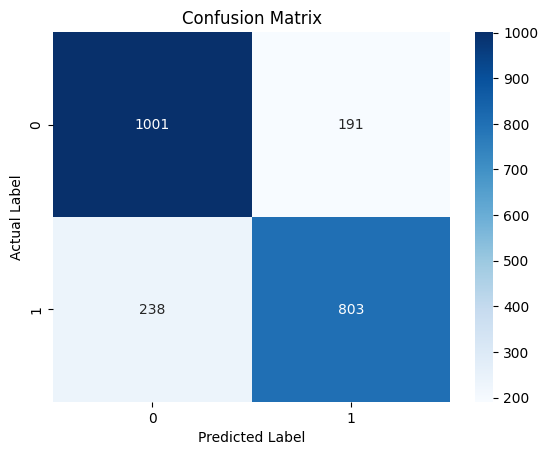

In [63]:
#import seaborn as sns

import matplotlib.pyplot as plt

# Confusion matrix plot
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()


In [64]:
# True Positive (TP): 803
# True Negative (TN): 1001
# False Positive (FP): 191
# False Negative (FN): 238

# should see from True Label

# Interpretation
# True Positive (TP): These are the instances where the model predicted positive, and the actual class is also positive.
# True Negative (TN): These are the instances where the model predicted negative, and the actual class is also negative.
# False Positive (FP): These are the instances where the model predicted positive, but the actual class is negative.
# False Negative (FN): These are the instances where the model predicted negative, but the actual class is positive.



# Support Vector Machine Classifier

In [65]:
# Model

from sklearn.svm import SVC
svm = SVC(kernel= 'rbf')

# Fitting the model

svm.fit(X_train, y_train)

SVC()

In [66]:
#predicting from the model

y_pred = svm.predict(X_test)

In [67]:
#Evaluation

from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
print('Accuracy :', accuracy_score(y_test,y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy : 0.8459471562919839
Confusion Matrix:
 [[974 218]
 [126 915]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.82      0.85      1192
           1       0.81      0.88      0.84      1041

    accuracy                           0.85      2233
   macro avg       0.85      0.85      0.85      2233
weighted avg       0.85      0.85      0.85      2233



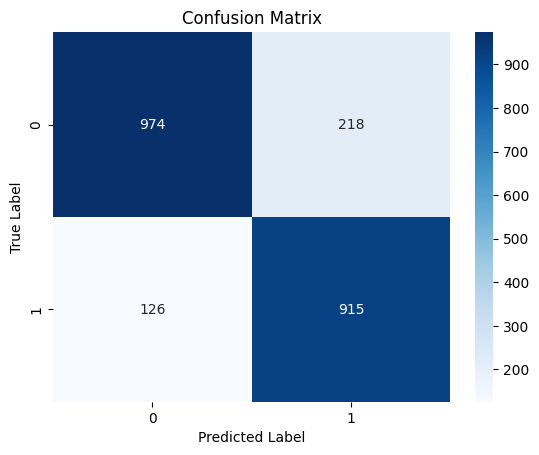

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix plot
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


# Random Forest Classifier

In [69]:
# Model

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators= 100)

# Fitting the model

rf.fit(X_train, y_train)

RandomForestClassifier()

In [70]:
#predicting from the model

y_pred = rf.predict(X_test)

In [71]:
# pred = pd.DataFrame(y_pred,columns = ['Deposit'])

In [72]:
# pred.Deposit.value_counts()

In [73]:
#Evaluation

from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
print('Accuracy :', accuracy_score(y_test,y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy : 0.851321092700403
Confusion Matrix:
 [[978 214]
 [118 923]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.82      0.85      1192
           1       0.81      0.89      0.85      1041

    accuracy                           0.85      2233
   macro avg       0.85      0.85      0.85      2233
weighted avg       0.85      0.85      0.85      2233



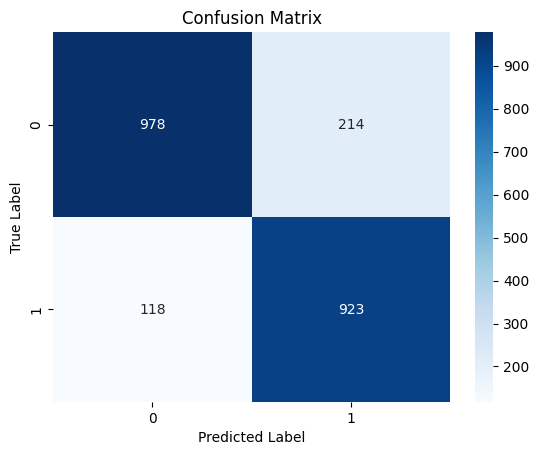

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix plot
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [75]:
# Feature Engineering

# after training & testing - Biased & variance
